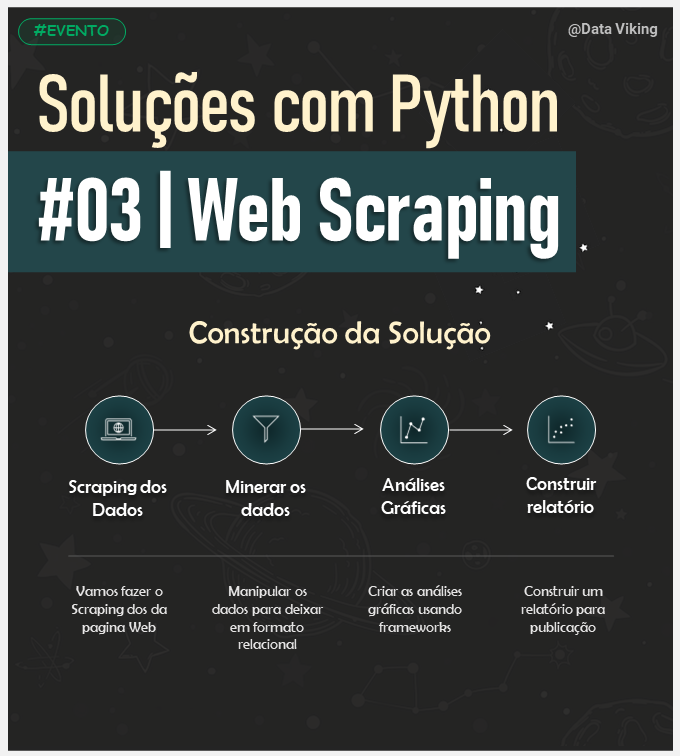

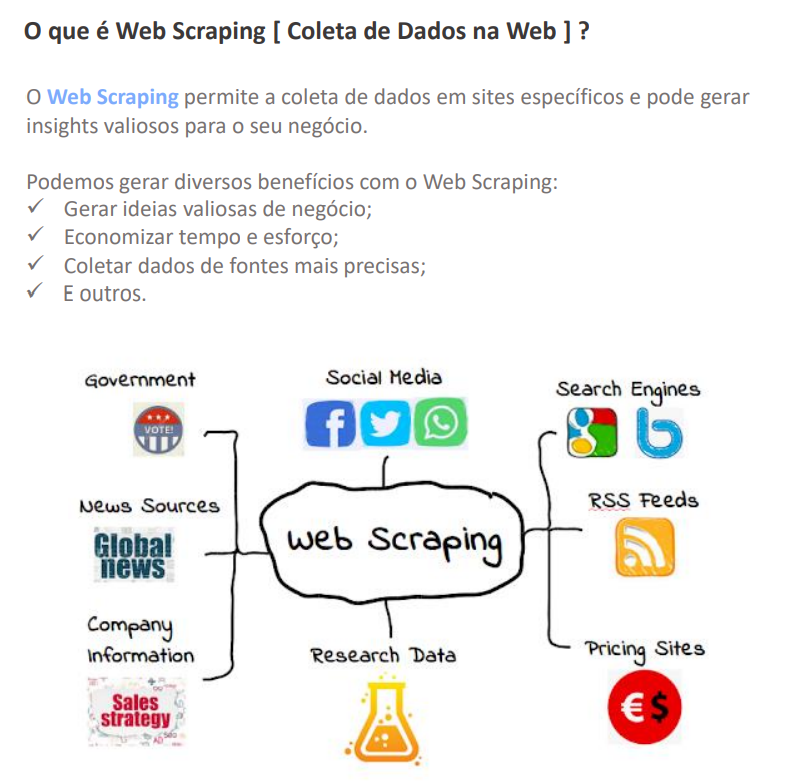

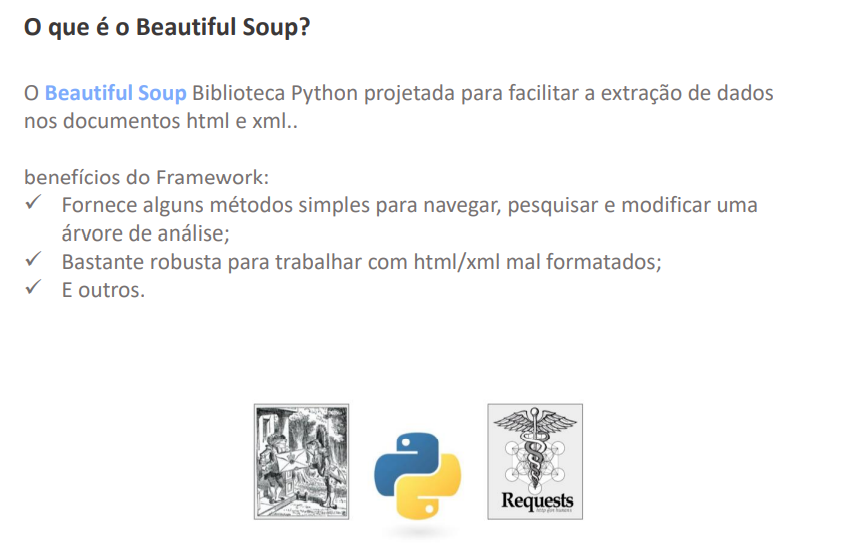

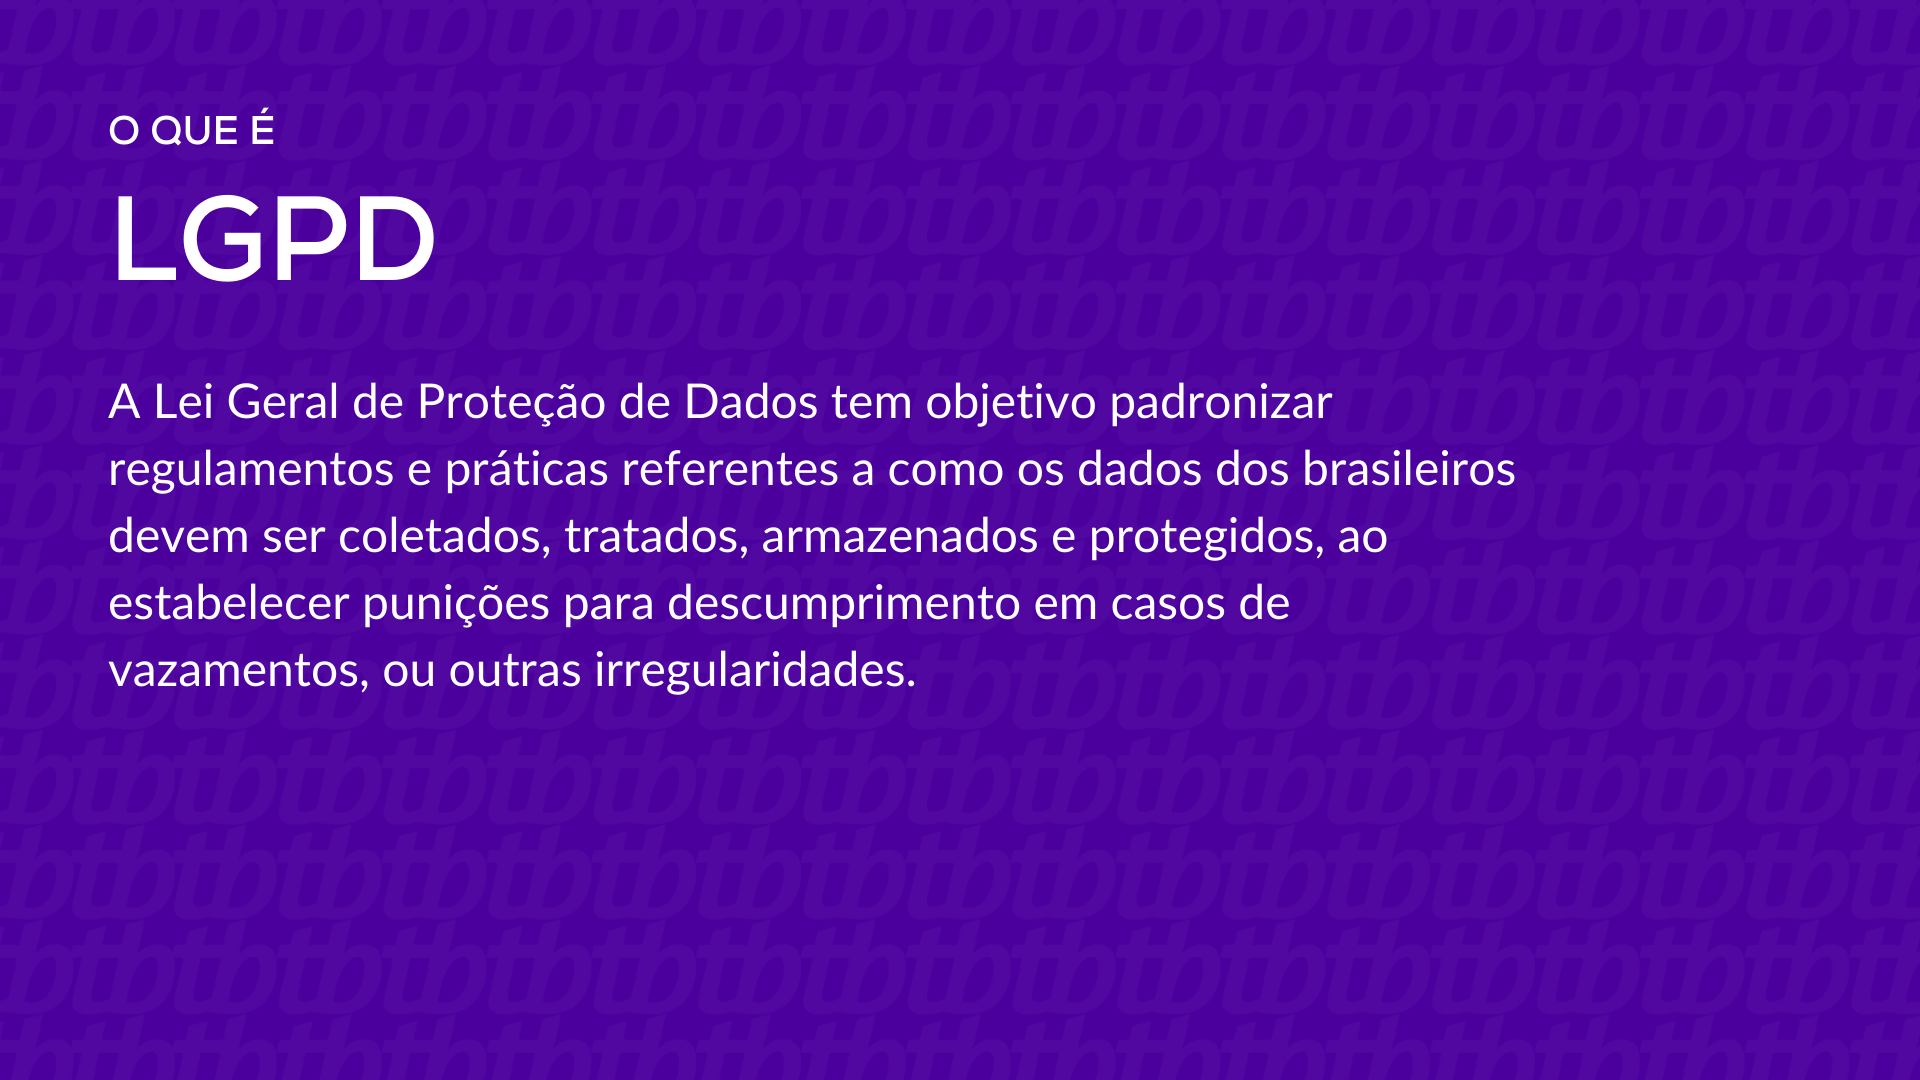

In [ ]:
# Libs
#!pip intall WordCloud
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup
import requests

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Link do site
Site = 'https://news.google.com/search?for=americanas&hl=pt-BR&gl=BR&ceid=BR%3Apt-419'

# Requisição
Pagina = requests.get( Site )

In [ ]:
Coleta = BeautifulSoup( Pagina.text, 'html.parser')

In [ ]:
# Buscar
Coleta.title.string

'Google Notícias - Pesquisar'

In [ ]:
Coleta.title.name

'title'

In [ ]:
Coleta.find( class_='cp7Yvc').string

'Notícias sobre Americanas, Sicupira'

In [ ]:
Coleta.find( class_='cp7Yvc').name

'div'

In [ ]:
len( Coleta.find_all('span') )

492

In [ ]:
# Solução
def Buscar_Empresas(ticket):

  # Criando a URK
  Url = f'https://news.google.com/search?for={ticket}&hl=pt-BR&gl=BR&ceid=BR%3Apt-419'

  # Resposta
  Resposta = requests.get( Url )

  # Codigo --> SOAP
  Codigo_HTML = Resposta.text

  # Converter SOAP
  Objeto_Soup = BeautifulSoup( Codigo_HTML, 'html.parser')

  return Objeto_Soup

In [ ]:
# Todas as informações
Dados = Buscar_Empresas('Americanas')

len( Dados )

# Buscando os titulos
Elementos = Dados.find_all('h3')

In [ ]:
# Buscando os textos
Noticias = [ Texto.get_text() for Texto in Elementos ]
print('Noticias')
print( len(Noticias) )

Noticias
87


In [ ]:
print('***' * 7 )
print('*** Notícias localizadas ***')
print('***' * 7 )

for Numero, Loop in enumerate( Noticias[0:5] ):
  print('--' * 10)
  print( Loop )

*********************
*** Notícias localizadas ***
*********************
--------------------
Americanas: como as 'ordens do Beto' Sicupira definiram estratégias e a cultura da empresa
--------------------
Justiça aceita proposta de acionistas para emprestar até R$ 2 bi a Americanas
--------------------
Lucro do Bradesco desaba com reserva para se proteger de calote da Americanas
--------------------
'Efeito Americanas' faz Bradesco ter menor lucro trimestral desde 2006
--------------------
Entenda por que o rombo nas Americanas pode afetar a PLR dos bancários


In [ ]:
Concatenar = ''

for Loop in Noticias:
  Quebra = Loop.split()

  for Palavra in Quebra:
    Concatenar = Concatenar + ' ' + Palavra

In [ ]:
Concatenar

' Americanas: como as \'ordens do Beto\' Sicupira definiram estratégias e a cultura da empresa Justiça aceita proposta de acionistas para emprestar até R$ 2 bi a Americanas Lucro do Bradesco desaba com reserva para se proteger de calote da Americanas \'Efeito Americanas\' faz Bradesco ter menor lucro trimestral desde 2006 Entenda por que o rombo nas Americanas pode afetar a PLR dos bancários Abalos provocados por Americanas, Oi e Light afetam fundos com debêntures e atingem 3,5 milhões de cotistas Americanas são multadas em R$ 5 mil por revista \'vexatória\' em funcionário Americanas: "Fraude monstruosa", diz presidente de associação de investidores Justiça determina que Microsoft entregue e-mails da Americanas Justiça manda Microsoft entregar emails de executivos da Americanas Americanas: crise já dá sinais nas lojas de Salvador Cronologia: o início da queda das Lojas Americanas 11 ações americanas para diversificar enquanto os juros nos EUA permanecem elevados CVM abre 4 novos proces

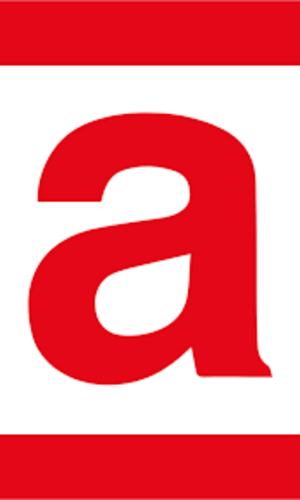

In [ ]:
from PIL import Image
Image.open('americanas.png')

In [ ]:
Mascara = np.array( Image.open('americanas.png') )
Mascara[0:10]

array([[[233,  74,  83],
        [233,  74,  83],
        [233,  74,  83],
        ...,
        [233,  74,  83],
        [233,  74,  83],
        [233,  74,  83]],

       [[230,  47,  59],
        [230,  47,  59],
        [230,  47,  59],
        ...,
        [230,  47,  59],
        [230,  47,  59],
        [230,  47,  59]],

       [[227,   6,  22],
        [227,   6,  22],
        [227,   6,  22],
        ...,
        [227,   6,  22],
        [227,   6,  22],
        [227,   6,  22]],

       ...,

       [[227,   7,  24],
        [227,   7,  24],
        [227,   7,  24],
        ...,
        [227,   7,  24],
        [227,   7,  24],
        [227,   7,  24]],

       [[227,   7,  24],
        [227,   7,  24],
        [227,   7,  24],
        ...,
        [227,   7,  24],
        [227,   7,  24],
        [227,   7,  24]],

       [[227,   7,  24],
        [227,   7,  24],
        [227,   7,  24],
        ...,
        [227,   7,  24],
        [227,   7,  24],
        [227,   7,  24]]

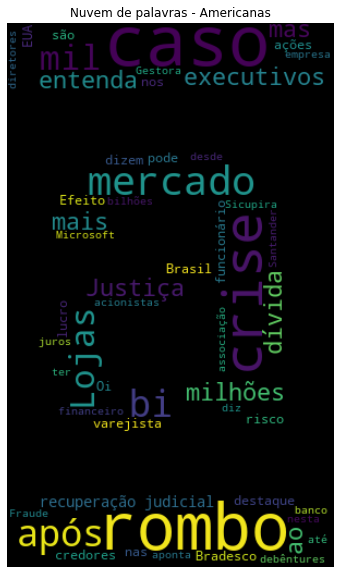

In [ ]:
# Criando a nuvem
Nuvem_Palavras = WordCloud(
  width= 1200,
  height= 1000,
  mask=Mascara,
  max_words=100,
  min_font_size=10,
  # Remover palavras
  stopwords=['Americanas', 'o', 'de', 'da', 'em', 'que', 'e', 'a', 'das', 'não', 'dos', 'Veja', 'sobre', 'AMER3', 'é', 'na', 'com', 'Por', 'as', 'os', 'como', 'do', 'para', 'no', 'à', 'R', 'se']
  ).generate( Concatenar )

Figura, Eixo = plt.subplots( figsize=(12, 10) )
plt.title('Nuvem de palavras - Americanas')
Eixo.imshow( Nuvem_Palavras, interpolation='bilinear' )
Eixo.set_axis_off()
plt.savefig('Analise_Nuvem_Palavras.png')